In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## dontpatronizeme_pcl

In [2]:
data_pcl = pd.read_csv("./dontpatronizeme_v1.4/dontpatronizeme_pcl.tsv", sep="\t", names=['par_id','art_id','keyword','country_code','text','label'], skiprows=3)
data_pcl.head()

,par_id,art_id,keyword,country_code,text,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


In [3]:
data_pcl['text']

0        We 're living in times of absolute insanity , ...
1        In Libya today , there are countless number of...
2        White House press secretary Sean Spicer said t...
3        Council customers only signs would be displaye...
4        " Just like we received migrants fleeing El Sa...
                               ...                        
10464    Sri Lankan norms and culture inhibit women fro...
10465    He added that the AFP will continue to bank on...
10466    " She has one huge platform , and information ...
10467    " Anja Ringgren Loven I ca n't find a word to ...
10468    " Guinness World Record of 540lbs of 7-layer m...
Name: text, Length: 10469, dtype: object

In [4]:
data_pcl['label']

0        0
1        0
2        0
3        0
4        0
        ..
10464    1
10465    0
10466    3
10467    4
10468    3
Name: label, Length: 10469, dtype: int64

Each paragraph has been annotated by two annotators as 0 (No PCL), 1 (borderline PCL) and 2 (contains PCL). The combined annotations have been used in the following graded scale:

	0 -> Annotator 1 = 0 AND Annotator 2 = 0
	1 -> Annotator 1 = 0 AND Annotator 2 = 1 OR Annotator 1 = 1 AND Annotator 2 = 0
	2 -> Annotator 1 = 1 AND Annotator 2 = 1
	3 -> Annotator 1 = 1 AND Annotator 2 = 2 OR Annotator 1 = 2 AND Annotator 2 = 1
	4 -> Annotator 1 = 2 AND Annotator 2 = 2

In [5]:
x = data_pcl['text'].to_numpy(dtype=str)
y = data_pcl['label'].to_numpy(dtype=np.int)
y.shape, y.min(), y.max(), y.mean(), y.var()

((10469,), 0, 4, 0.3986054064380552, 0.9778985231573213)

{0: 8529, 1: 947, 2: 144, 3: 458, 4: 391}


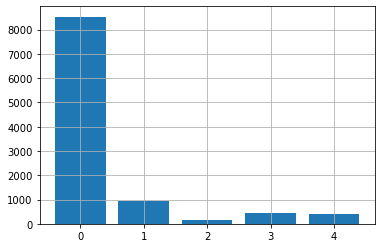

In [6]:
n_per_annotation = {}
for annotation in y:
    n_per_annotation[annotation] = n_per_annotation.get(annotation, 0) + 1
print(n_per_annotation)
plt.bar(n_per_annotation.keys(), n_per_annotation.values())
plt.grid()

	The experiments reported in the paper consider the following tag grouping: 
	- {0,1}   = No PCL
	- {2,3,4} = PCL

In [7]:
y_binary = np.array((y>1.5), dtype=int)
y_binary.shape, y_binary.sum(), y_binary.sum()/len(y_binary)

((10469,), 993, 0.09485146623364218)

{0: 9476, 1: 993}


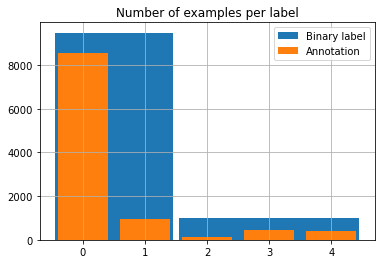

In [8]:
n_per_binary = {}
n_per_binary[0] = len(y_binary) - y_binary.sum()
n_per_binary[1] = y_binary.sum()
print(n_per_binary)
plt.bar([0.5, 3], n_per_binary.values(), width=[1.9, 2.9], label='Binary label')
plt.bar(n_per_annotation.keys(), n_per_annotation.values(), label="Annotation")
plt.title("Number of examples per label")
plt.legend()
plt.grid()

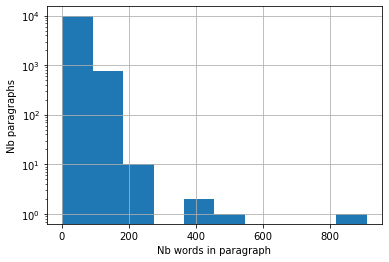

In [9]:
n_words = np.array([len(text.split()) for text in x])
plt.hist(n_words)
plt.yscale('log')
plt.ylabel("Nb paragraphs")
plt.xlabel("Nb words in paragraph")
plt.grid()

In [10]:
# Mininmum, maximum, and average number of words per example
n_words.min(), n_words.max(), n_words.mean().round(3)

(1, 909, 48.423)

In [11]:
n_words_per_label = {}
n_words_per_label[0] = []
n_words_per_label[1] = []
for i,label in enumerate(y_binary):
    n_words_per_label[label].append(n_words[i])
    
n_words_per_label[1] = np.array(n_words_per_label[1])
n_words_per_label[0] = np.array(n_words_per_label[0])

In [12]:
# Average number of words and standard deviation for examples WITHOUT PCL
n_words_per_label[0].sum() / len(n_words_per_label[0]), n_words_per_label[0].std()

(47.877902068383285, 28.62299840411097)

In [13]:
# Average number of words and standard deviation for examples WITH PCL
n_words_per_label[1].sum() / len(n_words_per_label[1]), n_words_per_label[1].std()

(53.620342396777446, 32.76348563600537)

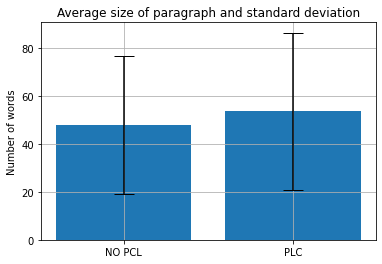

In [14]:
bars = [n_words_per_label[0].sum() / len(n_words_per_label[0]), n_words_per_label[1].sum() / len(n_words_per_label[1])]
errors = [n_words_per_label[0].std(), n_words_per_label[1].std()]
plt.bar(["NO PCL", "PLC"],bars, yerr=errors, capsize=10)
plt.title("Average size of paragraph and standard deviation")
plt.ylabel("Number of words")
plt.grid()

In [15]:
# Medians
np.median(n_words_per_label[0]), np.median(n_words_per_label[1])

(42.0, 47.0)

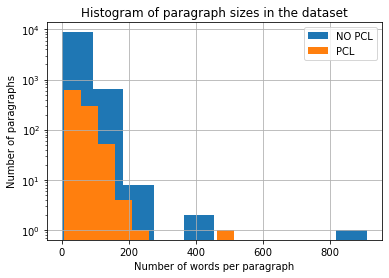

In [16]:
plt.hist(n_words_per_label[0], label="NO PCL")
plt.hist(n_words_per_label[1], label="PCL")
plt.yscale('log')
plt.yscale('log')
plt.legend()
plt.title("Histogram of paragraph sizes in the dataset")
plt.xlabel("Number of words per paragraph")
plt.ylabel("Number of paragraphs")
plt.grid()

## dontpatronizeme_categories

In [17]:
names = ["par_id", "art_id", "text", "keyword", "country_code", "span_start", "span_finish", "span_text", "pcl_category", "number_of_annotators"]

In [18]:
data_categories = pd.read_csv("./dontpatronizeme_v1.4/dontpatronizeme_categories.tsv", sep="\t", names=names, skiprows=3)
data_categories.head()

,par_id,art_id,text,keyword,country_code,span_start,span_finish,span_text,pcl_category,number_of_annotators
0,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,201,236,put their situation in perspective,Authority_voice,2
1,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,240,274,help them communicate with others,Unbalanced_power_relations,2
2,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,274,300,who could provide support,Unbalanced_power_relations,1
3,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,384,434,plan for their needs and the needs of their child,Authority_voice,2
4,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,0,35,We also know that they can benefit,Unbalanced_power_relations,1


In [19]:
n_example_per_category = {}
for cat in data_categories["pcl_category"]:
    n_example_per_category[cat] = n_example_per_category.get(cat, 0) + 1
n_example_per_category

{'Authority_voice': 285,
 'Unbalanced_power_relations': 968,
 'Shallow_solution': 227,
 'Presupposition': 296,
 'Compassion': 682,
 'Metaphors': 250,
 'The_poorer_the_merrier': 52}

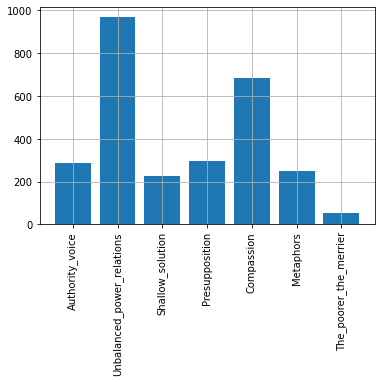

In [20]:
plt.bar(n_example_per_category.keys(), n_example_per_category.values())
plt.xticks(rotation=90)
plt.grid()

In [21]:
n_categories_per_example = np.zeros(len(data_pcl), dtype=int)
for i in sorted(data_categories['par_id'] - 1):
    n_categories_per_example[i] = n_categories_per_example[i] +1

In [22]:
(n_categories_per_example!=0).sum() == y_binary.sum()

True